# Exercise 14: Mediation

This homework assignment is designed to give you practice with mediation. You won't need to load in any data for this homework -- we'll simulate data instead.

---
## 1. Simulating data (3 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form: 
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally: 

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms. 

In [3]:
sample_size = 100 # How many children in data set? 
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0. 
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa, 
                          beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
        age = runif(sample_size, age_lo, age_hi)
        x = beta_x0 + beta_xa*age + rnorm(sample_size, mean=0, sd=sd_x)
        c = beta_c0 + beta_ca*age + beta_cx*x + rnorm(sample_size, mean= 0, sd=sd_c)
        data.frame(age,x,c)
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,age,x,c
,<dbl>,<dbl>,<dbl>
1,137.4704,133.36514,591.1313
2,143.6732,18.93043,196.0122
3,167.3010,215.00505,1000.7360
4,189.0393,82.51853,207.2283
5,180.7085,111.48379,485.6929
6,143.5975,123.49974,426.2450


---
## 2. Visualizing Data (2 point)

Load the `tidyverse` library.

In [4]:
# WRITE YOUR CODE HERE
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 4.2.2"
── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 1.0.0 
Warning message:
"package 'ggplot2' was built under R version 4.2.2"
Warning message:
"package 'tibble' was built under R version 4.2.2"
Warning message:
"package 'tidyr' was built under R version 4.2.2"
Warning message:
"package 'readr' was built under R version 4.2.2"
Warning message:
"package 'purrr' was built under R version 4.2.2"
Warning message:
"package 'dplyr' was built under R version 4.2.2"
Warning message:
"package 'forcats' was built under R version 4.2.2"
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() ma

a) Plot the relationship between age and reading comprehension. 

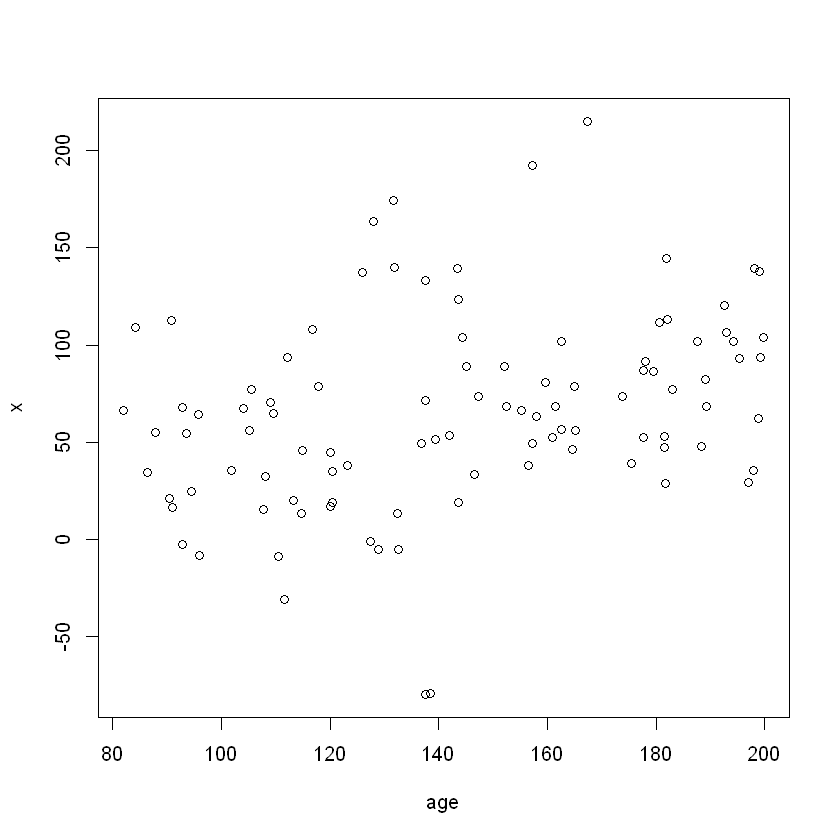

In [11]:
# WRITE YOUR CODE HERE
plot(x~age,data=dat)

b) Plot the relationship between reading experience, age, and reading comprehension.

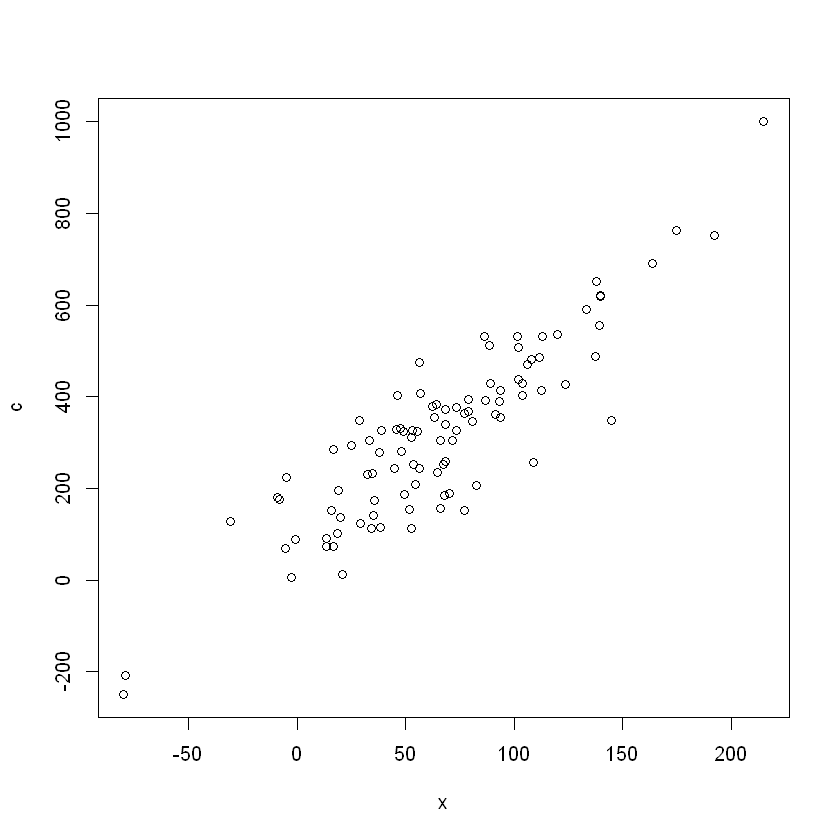

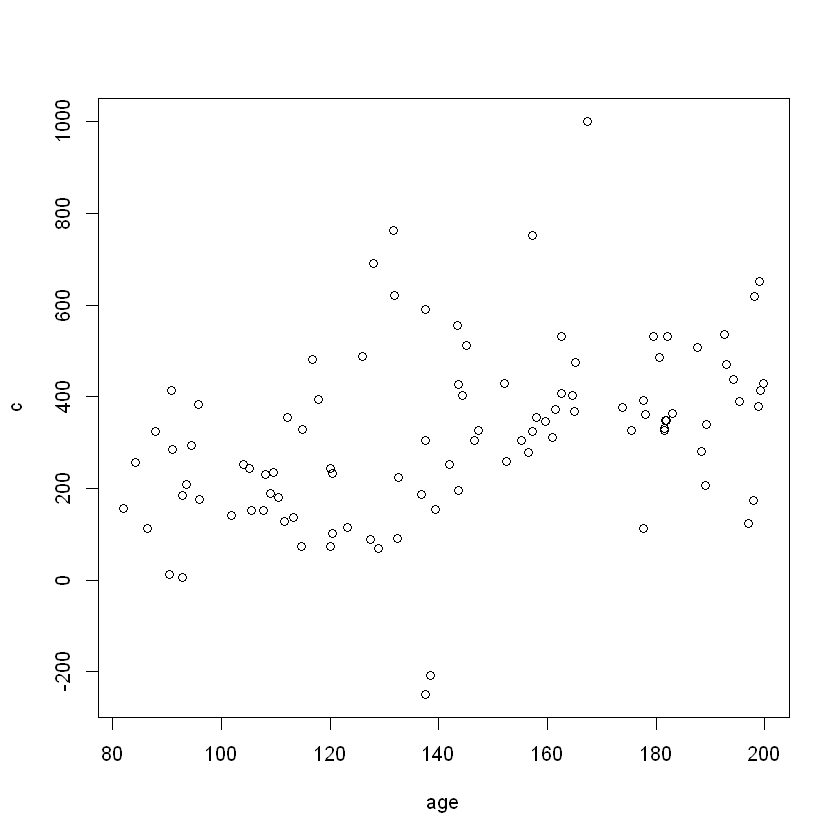

In [12]:
# WRITE YOUR CODE HERE
#not sure how to plot this... a line for age by itself and another for x with age?

plot(c~x+age,data=dat)


---
## 3. Mediation Analysis (4 points)

Load the `mediation` library.

In [1]:
# WRITE YOUR CODE HERE
#install.packages("mediation")
#install.packages("htmltools")
library(mediation)


Warning message:
"package 'mediation' was built under R version 4.2.3"
Loading required package: MASS

Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 4.2.2"
Loading required package: mvtnorm

Loading required package: sandwich

Warning message:
"package 'sandwich' was built under R version 4.2.2"
mediation: Causal Mediation Analysis
Version: 4.5.0




Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [8]:
# WRITE YOUR CODE HERE
lm1 = lm(x~age,data=dat)
lm2 = lm(c~age+x,data=dat)
med = mediate(lm1,lm2,treat="age",mediator="x")
summary(lm1)
summary(lm2)
summary(med)


Call:
lm(formula = x ~ age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-142.412  -29.208   -4.891   23.204  138.646 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.0841    20.3271   0.004  0.99671   
age           0.4559     0.1374   3.318  0.00127 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 47.63 on 98 degrees of freedom
Multiple R-squared:  0.101,	Adjusted R-squared:  0.0918 
F-statistic: 11.01 on 1 and 98 DF,  p-value: 0.001275



Call:
lm(formula = c ~ age + x, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-254.108  -52.300   -7.524   50.957  182.082 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.2102    36.9797   0.006   0.9955    
age           0.7239     0.2637   2.746   0.0072 ** 
x             3.2433     0.1838  17.649   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 86.66 on 97 degrees of freedom
Multiple R-squared:  0.8005,	Adjusted R-squared:  0.7963 
F-statistic: 194.5 on 2 and 97 DF,  p-value: < 2.2e-16



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              1.467        0.577         2.42   0.002 ** 
ADE               0.727        0.224         1.23   0.012 *  
Total Effect      2.194        1.205         3.21  <2e-16 ***
Prop. Mediated    0.665        0.413         0.87   0.002 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Sample Size Used: 100 


Simulations: 1000 


---
## 5. Reflection (1 point)
How do you interpret these results? Why do you think the analysis yielded this result?

> The ACME and ADE are both statistically significant so we can say that there is both a direct effect (age on c) and indirect effect (age on x and x on c). The coefficient for the direct effect would be 0.721 and the indirect effect 1.483, and the total effect 2.204.

> Looking at lm1 and lm2 we can see that the direct effect is seen for c ~ age + x but x's effect seems to be 3.2433. That makes sense though because we are looking at age's indirect effect through x, not x's effect itself. If we look at age on x we get 0.4559, which when multiplied with 3.2433 gives us our indirect effect.

**DUE:** 5pm EST, April 3, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*